## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 10

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
def manual_bilateral_filter(image, d, sigma_r, sigma_s):
    
    img_float = image.astype(np.float32)
    height, width = img_float.shape
    new_image = np.zeros_like(img_float)
    
    pad = d // 2
    padded_image = cv2.copyMakeBorder(img_float, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    
    x, y = np.meshgrid(np.arange(-pad, pad + 1), np.arange(-pad, pad + 1))
    spatial_kernel = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))
    
    for i in range(height):
        for j in range(width):
            roi = padded_image[i:i+d, j:j+d]
            
            center_intensity = padded_image[i+pad, j+pad]
            
            intensity_diff = roi - center_intensity
            range_kernel = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))
            
            weights = spatial_kernel * range_kernel
            
            norm_factor = np.sum(weights)
            new_image[i, j] = np.sum(weights * roi) / norm_factor
            
    return np.clip(new_image, 0, 255).astype(np.uint8)

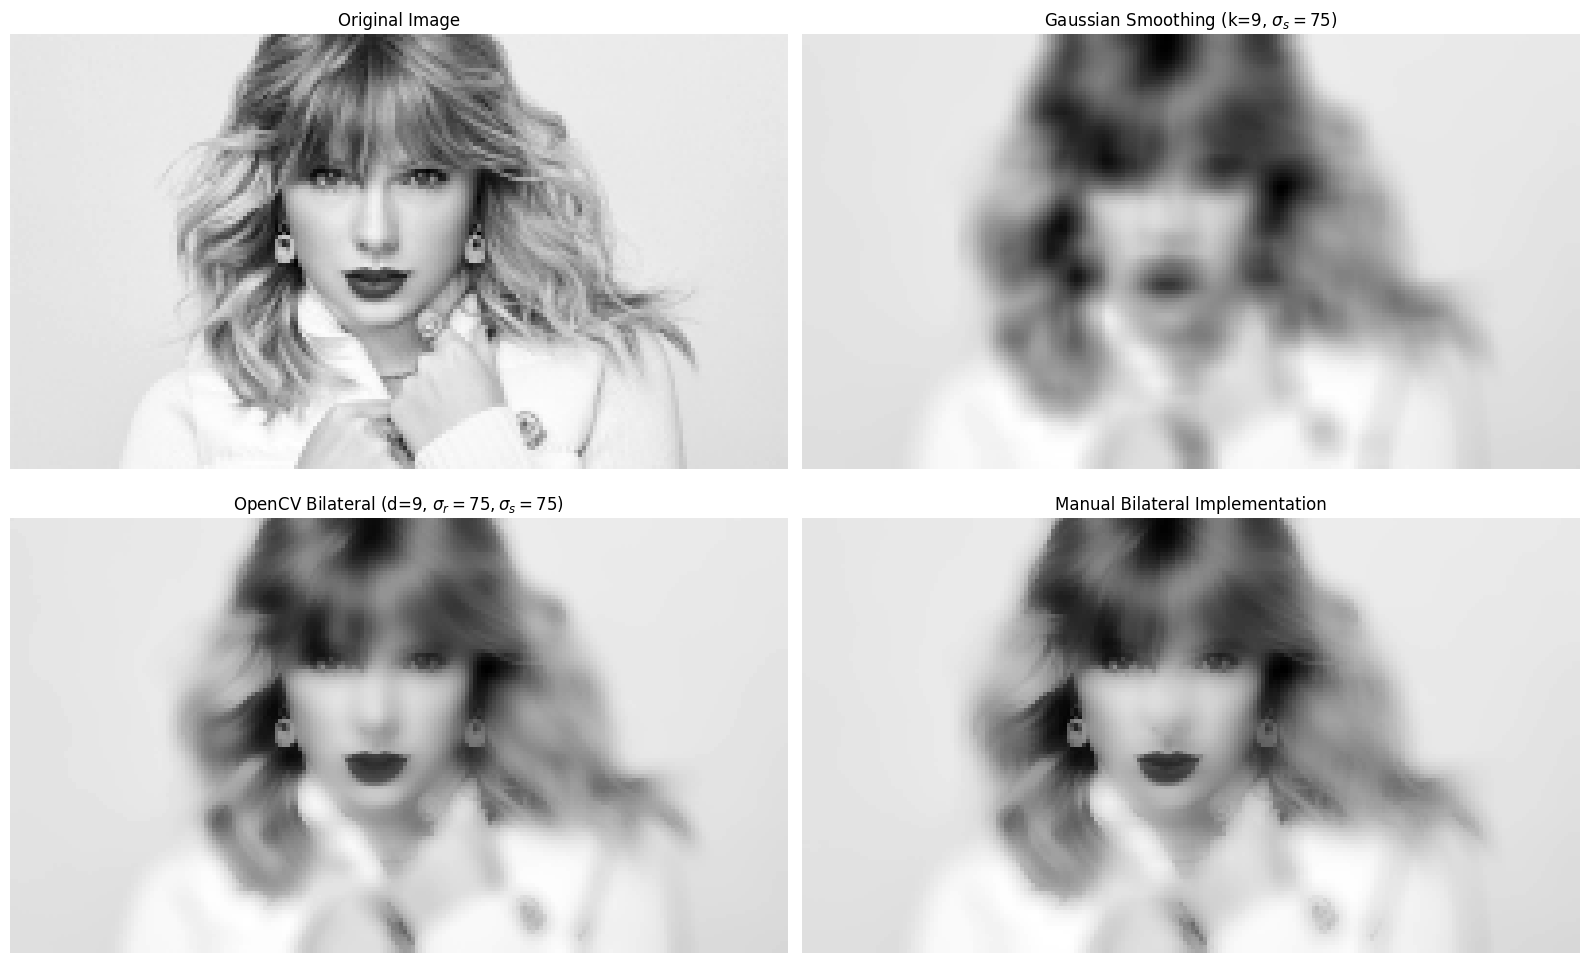

In [8]:
img_path = 'assets/a1q7images/taylor_small.jpg'

if os.path.exists(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    d = 9          # Diameter of pixel neighborhood
    sigma_r = 75   # Filter sigma in the color space
    sigma_s = 75   # Filter sigma in the coordinate space

    gaussian_smooth = cv2.GaussianBlur(img, (d, d), sigma_s)
    
    bilateral_opencv = cv2.bilateralFilter(img, d, sigma_r, sigma_s)
    
    bilateral_manual = manual_bilateral_filter(img, d, sigma_r, sigma_s)
    
    plt.figure(figsize=(16, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(gaussian_smooth, cmap='gray')
    plt.title(f'Gaussian Smoothing (k={d}, $\\sigma_s={sigma_s}$)')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(bilateral_opencv, cmap='gray')
    plt.title(f'OpenCV Bilateral (d={d}, $\\sigma_r={sigma_r}, \\sigma_s={sigma_s}$)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(bilateral_manual, cmap='gray')
    plt.title('Manual Bilateral Implementation')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    
else:
    print(f"Error: File not found at {img_path}")